In [ ]:
import seaborn as sns
sns.set_theme()
import pandas as pd
import numpy as np
import time
import datetime
from scipy import stats

### Load data

In [ ]:
# vaccination data from https://usafacts.org/visualizations/covid-vaccine-tracker-states
vax = pd.read_csv("COVID19_Vaccination_Demographics.csv")
# case data from https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4
#case = pd.read_csv("COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv")

### Clean data

In [ ]:
# vaccination data
lst = []
for k in vax['DATE']:
    lst.append(datetime.datetime.strptime(k, '%Y-%m-%d'))
vax['DATE'] = lst

vax.drop(columns=['STATEFIPS'], inplace=True)

In [ ]:
vax = vax.replace('  ', np.NaN)
vax = vax.replace(r'^\s*$', np.NaN, regex=True)

In [ ]:
vax['ACS_Population'] = vax['ACS_Population'].astype(float)
vax['Administered_Dose1_recip'] = vax['Administered_Dose1_recip'].astype(float)
vax['Administered_Dose2_recip'] = vax['Administered_Dose2_recip'].astype(float)
vax['Full_or_Partial_Vaccinated_Percent'] = vax['Full_or_Partial_Vaccinated_Percent'].astype(float)
vax['Fully_Vaccinated'] = vax['Fully_Vaccinated'].astype(float)
vax['Fully_Vaccinated_Percent'] = vax['Fully_Vaccinated_Percent'].astype(float)

In [ ]:
# case data
#lst = []
#for k in case['case_month']:
#    lst.append(datetime.datetime.strptime(k, '%Y-%m'))
#case['case_month'] = lst

#case = case.replace('Missing', np.NaN)

#### make data sets a little bit more compatable

In [ ]:
# rename columns to easier/more similar things
vax = vax.rename(columns={'GEOGRAPHY_TYPE':'locality', 'DEMOGRAPHIC_CATEGORY':'demographic', 'DEMOGRAPHIC_GROUP':'group', 
                   'Administered_Dose1_recip': 'dose1_count', 'Administered_Dose2_recip':'dose2_count', 
                   'Full_or_Partial_Vaccinated_Percent':'somevax_per', 'Fully_Vaccinated': 'fullvax_count', 
                   'Fully_Vaccinated_Percent': 'fullvax_per', 'ACS_Population':'population', 'DATE':'date', 
                    'STATE_NAME': 'state'})
#case = case.rename(columns={'case_month':'date', 'res_state':'state', 'age_group':'age'})

In [ ]:
# sandardize names/codes/strings

# dictionary code from https://gist.github.com/rogerallen/1583593
state_codes = {"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ","Arkansas": "AR","California": "CA","Colorado": "CO",
               "Connecticut": "CT","Delaware": "DE","Florida": "FL","Georgia": "GA","Hawaii": "HI","Idaho": "ID",
               "Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS","Kentucky": "KY","Louisiana": "LA",
               "Maine": "ME","Maryland": "MD","Massachusetts": "MA","Michigan": "MI","Minnesota": "MN","Mississippi": "MS",
               "Missouri": "MO","Montana": "MT","Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ",
               "New Mexico": "NM","New York": "NY","North Carolina": "NC","North Dakota": "ND","Ohio": "OH","Oklahoma": "OK",
               "Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI","South Carolina": "SC","South Dakota": "SD",
               "Tennessee": "TN","Texas": "TX","Utah": "UT","Vermont": "VT","Virginia": "VA","Washington": "WA",
               "West Virginia": "WV","Wisconsin": "WI","Wyoming": "WY","District of Columbia": "DC","American Samoa": "AS",
               "Guam": "GU","Northern Mariana Islands": "MP","Puerto Rico": "PR","United States Minor Outlying Islands": "UM",
               "U.S. Virgin Islands": "VI"}
vax['state'] = vax['state'].map(state_codes)

In [ ]:
dem_codes = {'AGE GROUP': 'age', 'RACE/ETHNICITY':'race/eth', 'SEX':'sex'}
vax['demographic'] = vax['demographic'].map(dem_codes)

In [ ]:
#this is blurring the accuracy of the age data a little bit, so we can take this out if need be, but this standarizes
#the age groups into 10 year bins, and if preset categories do not match those bins, they get sorted into the one which the
#min of the range belongs in OR to the bin that the range most closely aligns with
group_codes = {'20 TO 44':'18-49', '16 TO 19': '0-17', '65 YEARS AND OVER': '65+', '10 TO 19': '0-17', 
               '17 YEARS AND UNDER':'0-17', '45 TO 54': '50-64', '55 TO 64': '50-64', '18 TO 29':'18-49', 
               '30 TO 49':'18-49', '65 TO 74':'65+','75 YEARS AND OVER': '65+', '18 TO 24':'18-49', '25 TO 49':'18-49', 
               '50 TO 64':'50-64', '16 TO 24':'0-17','25 TO 34':'18-49', '35 TO 44':'18-49', '20 TO 29':'18-49', 
               '30 TO 39': '18-49', '40 TO 49':'18-49', '50 TO 59':'50-64', '60 TO 69':'65+', '70 TO 79':'65+', 
               '80 YEARS AND OVER':'65+', '9 YEARS AND UNDER':'0-17', '25 TO 29':'18-49','75 TO 84':'65+', 
               '16 TO 17':'0-17', '25 TO 39':'18-49', '85 YEARS AND OVER':'65+', '60 TO 74':'65+', 
               '18 YEARS AND UNDER':'0-17', '15 TO 19': '0-17', '20 TO 24': '18-49', '19 YEARS AND UNDER':'0-17', 
               '16 TO 64': '18-49', '25 TO 29':'18-49', '30 TO 34':'18-49', '35 TO 39':'18-49', '40 TO 44':'18-49', 
               '45 TO 49':'18-49','50 TO 54':'50-64', '55 TO 59':'50-64', '60 TO 64':'50-64', '65 TO 69':'65+', 
               '70 TO 74':'65+', '75 TO 79':'65+', 'FEMALE':'F', 'MALE':'M', 'BLACK':'Black','Unknown':'Unknown', 
               'AMERICAN INDIAN OR ALASKA NATIVE':'Native American', 'ASIAN':'Asian', 
               'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER':'NHPI', 'TWO OR MORE RACES OR OTHER':'Other', 'WHITE':'White',
               'HISPANIC OR LATINO':'Hispanic'}
vax['group'] = vax['group'].map(group_codes)

In [ ]:
#age_codes = {'0 - 17 years':'0-17', '18 to 49 years':'18-49', '50 to 64 years':'50-64', '65+ years':'65+'}
#case['age'] = case['age'].map(age_codes)

#### Split into regions 

In [ ]:
vax['region'] = ''

#divide up into regions
for k in range(len(vax['state'])):
    if vax.iloc[k,2] in ['CT', 'DE', 'DC', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']:
        vax.iloc[k,11] = 'northeast'
    elif vax.iloc[k,2] in ['IL', 'IN', 'IA', 'MI', 'MN', 'NE', 'OH', 'WI', 'MO']:
        vax.iloc[k,11] = 'midwest'
    elif vax.iloc[k,2] in ['AL', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'PR', 'SC', 'TN', 'TX', 'VI', 'WV']:
        vax.iloc[k,11] = 'south'
    elif vax.iloc[k,2] in ['AZ', 'ID', 'KS', 'MT', 'NM', 'ND', 'SD', 'UT', 'WY']:
        vax.iloc[k,11] = 'mountain west'
    elif vax.iloc[k,2] in ['CA', 'HI', 'NV','AK', 'CO', 'GU', 'OR', 'WA']:
        vax.iloc[k,11] = 'west'
        
northeast_pop = 3600000+994735+690345+1370000+7100000+1380000+9400000+20400000+13100000+1100000+645560
midwest_pop = 12850000+6800000+3210000+10200000+5700000+19700000+11750000+5900000+6160000
south_pop = 29800000+5100000+21600000+10700000+4510000+4670000+6200000+10700000+3957000+5149000+6829000+29000000+8536000+1792000
mountain_pop = 7279000+1787000+2913000+1069000+2097000+762062+884659+32306000+578759
west_pop = 39510000+1416000+3080000+731545+5759000+4218000+7615000

### the datasets we can plot

In [ ]:
#case = case.sort_values(by=['date'])
vax = vax.sort_values(by=['date'])

In [ ]:
regioned = vax.groupby(['region', 'date', 'demographic', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum', 'population':'mean'})

In [ ]:
age = vax[vax['demographic']=='age']
gender =vax[vax['demographic']=='sex']
race = vax[vax['demographic']=='race/eth']

## Visualizations

Overall plots of vaccinations by demographic

[Text(0.5, 1.0, 'Daily Count of Fully Vaccinated Individuals by Age (USA)')]

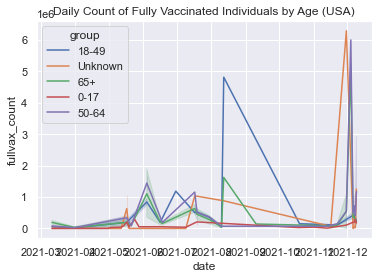

In [ ]:
sns.lineplot(data=age, x='date', y='fullvax_count', hue='group').set(title='Daily Count of Fully Vaccinated Individuals by Age (USA)')

[Text(0.5, 1.0, 'Daily Count of Fully Vaccinated Individuals by Gender (USA)')]

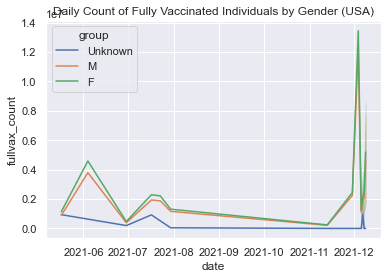

In [ ]:
sns.lineplot(data=gender, x='date', y='fullvax_count', hue='group').set(title='Daily Count of Fully Vaccinated Individuals by Gender (USA)')

[Text(0.5, 1.0, 'Daily Count of Fully Vaccinated Individuals by Race/Ethnicity (USA)')]

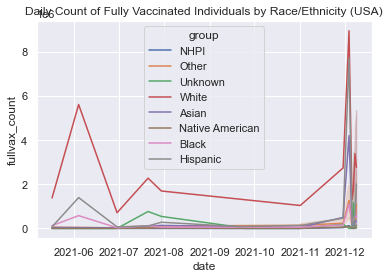

In [ ]:
sns.lineplot(data=race, x='date', y='fullvax_count', hue='group').set(title='Daily Count of Fully Vaccinated Individuals by Race/Ethnicity (USA)')

## Visualizations by Region

### Northeast

In [ ]:
NE_age = age[age['region']=='northeast']
NE_race = race[race['region']=='northeast']
NE_gender = gender[gender['region']=='northeast']

NE_race = NE_race.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
NE_race['dose1_per'] = NE_race['dose1_count']/ northeast_pop
NE_race['dose2_per'] = NE_race['dose2_count']/ northeast_pop

NE_age = NE_age.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
NE_age['dose1_per'] = NE_age['dose1_count']/ northeast_pop
NE_age['dose2_per'] = NE_age['dose2_count']/ northeast_pop

NE_gender = NE_gender.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
NE_gender['dose1_per'] = NE_gender['dose1_count']/ northeast_pop
NE_gender['dose2_per'] = NE_gender['dose2_count']/ northeast_pop

NE_gender.head(5)

dose1_count  dose2_count  dose1_per  dose2_per
date       group                                                  
2021-07-23 F          2478800.0    2212200.0   0.041465   0.037005
           M          2127300.0    1876900.0   0.035585   0.031396
           Unknown          0.0          0.0   0.000000   0.000000
2021-11-13 F           280220.0     239337.0   0.004687   0.004004
           M           256531.0     209900.0   0.004291   0.003511

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Age (Northeast)')]

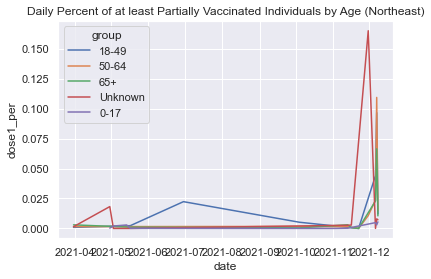

In [ ]:
sns.lineplot(data=NE_age, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Age (Northeast)')

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Race/Ethnicity (Northeast)')]

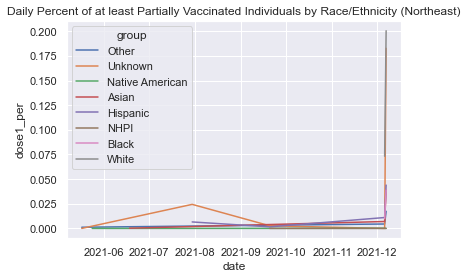

In [ ]:
sns.lineplot(data=NE_race, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Race/Ethnicity (Northeast)')

[Text(0.5, 1.0, 'Percent of at least Partially Vaccinated Individuals by Gender (Northeast)')]

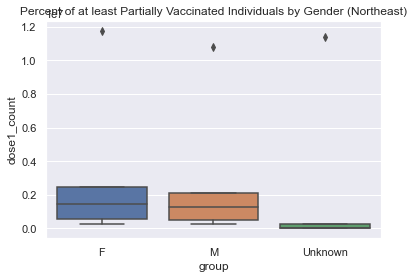

In [ ]:
NE_gender.reset_index(inplace=True)
sns.boxplot(data=NE_gender, x='group', y='dose1_count').set(title='Percent of at least Partially Vaccinated Individuals by Gender (Northeast)')

### Midwest

In [ ]:
MW_age = age[age['region']=='midwest']
MW_race = race[race['region']=='midwest']
MW_gender = gender[gender['region']=='midwest']

MW_race = MW_race.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
MW_race['dose1_per'] = MW_race['dose1_count']/ midwest_pop
MW_race['dose2_per'] = MW_race['dose2_count']/ midwest_pop

MW_age = MW_age.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
MW_age['dose1_per'] = MW_age['dose1_count']/ midwest_pop
MW_age['dose2_per'] = MW_age['dose2_count']/ midwest_pop

MW_gender = MW_gender.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
MW_gender['dose1_per'] = MW_gender['dose1_count']/ midwest_pop
MW_gender['dose2_per'] = MW_gender['dose2_count']/ midwest_pop

MW_gender.head(5)

dose1_count  dose2_count  dose1_per  dose2_per
date       group                                                  
2021-05-17 F          2775171.0    1132679.0   0.033732   0.013768
           M          2280796.0     882183.0   0.027723   0.010723
           Unknown    2471639.0     935193.0   0.030043   0.011367
2021-06-30 F                0.0     471299.0   0.000000   0.005729
           M                0.0     383934.0   0.000000   0.004667

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Gender (Midwest)')]

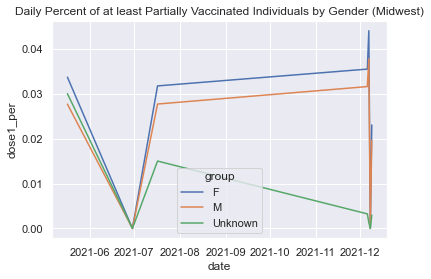

In [ ]:
sns.lineplot(data=MW_gender, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Gender (Midwest)')

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Race (Midwest)')]

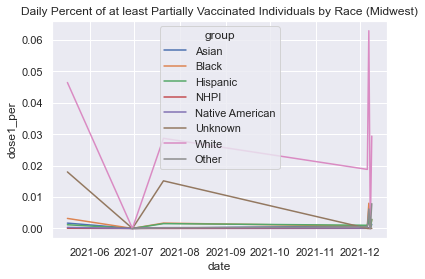

In [ ]:
sns.lineplot(data=MW_race, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Race (Midwest)')

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Age (Midwest)')]

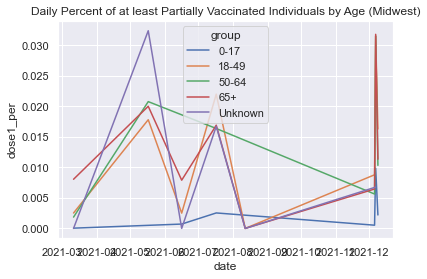

In [ ]:
sns.lineplot(data=MW_age, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Age (Midwest)')

### West

In [ ]:
W_age = age[age['region']=='west']
W_race = race[race['region']=='west']
W_gender = gender[gender['region']=='west']

W_race = W_race.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
W_race['dose1_per'] = W_race['dose1_count']/ west_pop
W_race['dose2_per'] = W_race['dose2_count']/ west_pop

W_age = W_age.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
W_age['dose1_per'] = W_age['dose1_count']/ west_pop
W_age['dose2_per'] = W_age['dose2_count']/ west_pop

W_gender = W_gender.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
W_gender['dose1_per'] = W_gender['dose1_count']/ west_pop
W_gender['dose2_per'] = W_gender['dose2_count']/ west_pop

W_gender.head(5)

dose1_count  dose2_count  dose1_per  dose2_per
date       group                                                  
2021-05-19 F           653418.0          0.0   0.010483   0.000000
           M           570737.0          0.0   0.009157   0.000000
           Unknown     828749.0          0.0   0.013296   0.000000
2021-07-30 F                0.0    1309509.0   0.000000   0.021009
           M                0.0    1160555.0   0.000000   0.018620

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Gender (West)')]

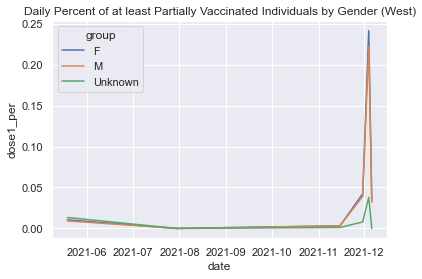

In [ ]:
sns.lineplot(data=W_gender, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Gender (West)')

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Race (West)')]

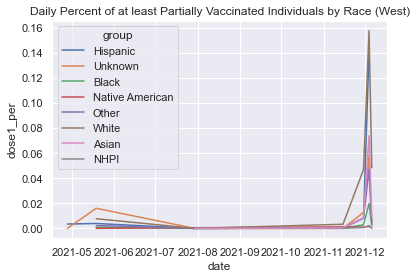

In [ ]:
sns.lineplot(data=W_race, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Race (West)')

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Age (West)')]

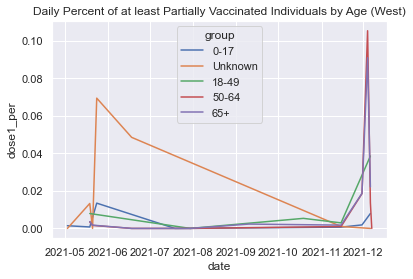

In [ ]:
sns.lineplot(data=W_age, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Age (West)')

### Mountain West

In [ ]:
Mt_age = age[age['region']=='mountain west']
Mt_race = race[race['region']=='mountain west']
Mt_gender = gender[gender['region']=='mountain west']

Mt_race = Mt_race.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
Mt_race['dose1_per'] = Mt_race['dose1_count']/ mountain_pop
Mt_race['dose2_per'] = Mt_race['dose2_count']/ mountain_pop

Mt_age = Mt_age.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
Mt_age['dose1_per'] = Mt_age['dose1_count']/ mountain_pop
Mt_age['dose2_per'] = Mt_age['dose2_count']/ mountain_pop

Mt_gender = Mt_gender.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
Mt_gender['dose1_per'] = Mt_gender['dose1_count']/ mountain_pop
Mt_gender['dose2_per'] = Mt_gender['dose2_count']/ mountain_pop

W_gender.head(5)

dose1_count  dose2_count  dose1_per  dose2_per
date       group                                                  
2021-05-19 F           653418.0          0.0   0.010483   0.000000
           M           570737.0          0.0   0.009157   0.000000
           Unknown     828749.0          0.0   0.013296   0.000000
2021-07-30 F                0.0    1309509.0   0.000000   0.021009
           M                0.0    1160555.0   0.000000   0.018620

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Gender (Mountain West)')]

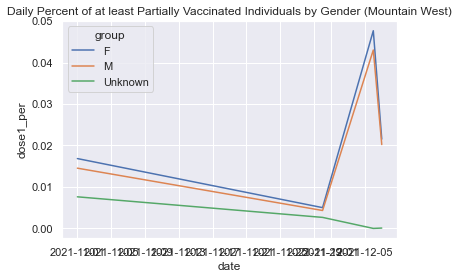

In [ ]:
sns.lineplot(data=Mt_gender, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Gender (Mountain West)')

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Race (Mountain West)')]

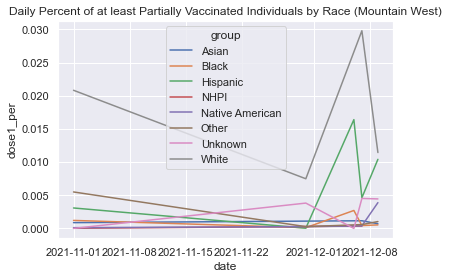

In [ ]:
sns.lineplot(data=Mt_race, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Race (Mountain West)')

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Age (Mountain West)')]

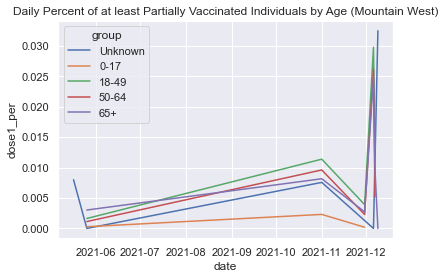

In [ ]:
sns.lineplot(data=Mt_age, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Age (Mountain West)')

### South

In [ ]:
S_age = age[age['region']=='south']
S_race = race[race['region']=='south']
S_gender = gender[gender['region']=='south']

S_race = S_race.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
S_race['dose1_per'] = S_race['dose1_count']/ south_pop
S_race['dose2_per'] = S_race['dose2_count']/ south_pop

S_age = S_age.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
S_age['dose1_per'] = S_age['dose1_count']/ south_pop
S_age['dose2_per'] = S_age['dose2_count']/ south_pop

S_gender = S_gender.groupby(['date', 'group']).agg({'dose1_count':'sum', 'dose2_count':'sum'})
S_gender['dose1_per'] = S_gender['dose1_count']/ south_pop
S_gender['dose2_per'] = S_gender['dose2_count']/ south_pop

S_gender.head(5)

dose1_count  dose2_count  dose1_per  dose2_per
date       group                                                  
2021-04-23 F           868199.0          0.0   0.005845        0.0
           M           687266.0          0.0   0.004627        0.0
           Unknown    1145516.0          0.0   0.007712        0.0
2021-05-10 F          2050247.0          0.0   0.013802        0.0
           M          1616862.0          0.0   0.010885        0.0

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Gender (South)')]

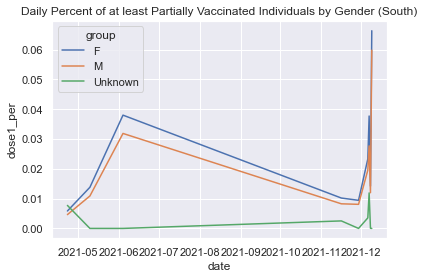

In [ ]:
sns.lineplot(data=S_gender, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Gender (South)')

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Race (South)')]

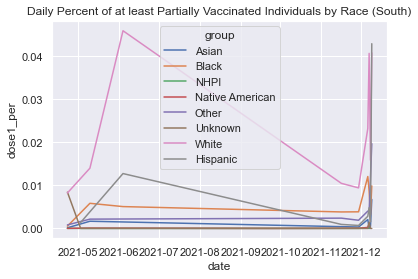

In [ ]:
sns.lineplot(data=S_race, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Race (South)')

[Text(0.5, 1.0, 'Daily Percent of at least Partially Vaccinated Individuals by Age (South)')]

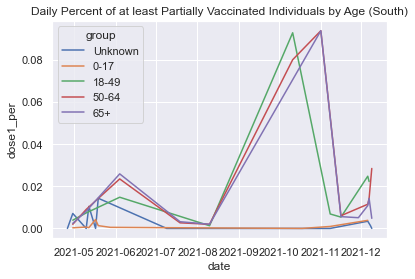

In [ ]:
sns.lineplot(data=S_age, x='date', y='dose1_per', hue='group').set(title='Daily Percent of at least Partially Vaccinated Individuals by Age (South)')